In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources\hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
#print(session)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results - OK

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# 1. GET THE LAST DATE REGISTER IN THE DB  
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
lastdate

'2017-08-23'

In [12]:
# 2. DATE IS SAVED AS A STRING. NEED TO BE CHANGED TO DATE FORMAT
lastdateD = dt.datetime.strptime(lastdate,'%Y-%m-%d')
print(lastdateD)
lastdateD

2017-08-23 00:00:00


datetime.datetime(2017, 8, 23, 0, 0)

In [13]:
## Calculate the date 1 year ago from the last data point in the database
# Find date from last 12 months from LastDate
last12monthsS = lastdateD - dt.timedelta(days=365)
print(last12monthsS)
last12monthsS

2016-08-23 00:00:00


datetime.datetime(2016, 8, 23, 0, 0)

In [143]:
# Perform a query to retrieve the data and precipitation scores
#Design a query to retrieve the last 12 months of precipitation data 
precipLast12Months = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last12monthsS).group_by(Measurement.date).all()

#session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last12monthsS).group_by(Measurement.date).limit(5).all()

# the results is a list of tuples of (date,precip). 

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01)]

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitationDF = pd.DataFrame(precipLast12Months, columns = ["date","prcp"])
precipitationDF.set_index("date", inplace=True,)
precipitationDF.head()


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [16]:
# Sort the dataframe by date
precipitationDF.sort_index(0,ascending=False)


,prcp
date,
2017-08-23,0.00
2017-08-22,0.00
2017-08-21,0.00
2017-08-20,0.00
2017-08-19,0.00
...,...
2016-08-28,0.01
2016-08-27,0.00
2016-08-26,0.00


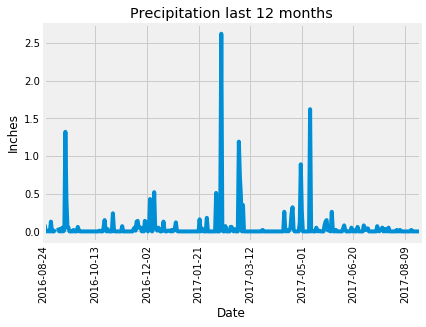

In [18]:
precipitationDF["prcp"].plot(title="Precipitation last 12 months", rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitationDF["prcp"].describe()

count    363.000000
mean       0.048843
std        0.205197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

In [59]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [68]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()



[('USC00513117', 2696),
 ('USC00518838', 342),
 ('USC00519523', 2572),
 ('USC00519281', 2772),
 ('USC00516128', 2484),
 ('USC00519397', 2685),
 ('USC00511918', 1932),
 ('USC00514830', 1937),
 ('USC00517948', 683)]

In [135]:
#The station with the highest number of observations
MostActiveStation = session.query(Measurement.station).group_by(Measurement.station).order_by(Measurement.prcp.desc()).first()

print(f'The station with the highest number of observations is {MostActiveStation[0]}')

The station with the highest number of observations is USC00513117


In [138]:
# Using the station id from the previous query, calculate the lowest PRECIPITATION recorded, 
# highest PRECIPITATION recorded, and average PRECIPITATION of the most active station?

MostActiveStationId = MostActiveStation[0]

minPrcp = session.query(func.min(Measurement.prcp)).filter(Measurement.station == MostActiveStationId).all()
maxPrcp = session.query(func.max(Measurement.prcp)).filter(Measurement.station == MostActiveStationId).all()
avgPrcp = session.query(func.avg(Measurement.prcp)).filter(Measurement.station == MostActiveStationId).all()
#type(maxPrcp) #--> List, why?
print(f'The lowest precipitation recorded for station {MostActiveStationId} was {minPrcp[0][0]}')
print(f'The highest precipitation recorded for station {MostActiveStationId} was {maxPrcp[0][0]}')
print(f'The aveage precipitation recorded for station {MostActiveStationId} was {avgPrcp[0][0]}')

The lowest precipitation recorded for station USC00513117 was 0.0
The highest precipitation recorded for station USC00513117 was 7.65
The aveage precipitation recorded for station USC00513117 was 0.14192136498516264


In [139]:
# Using the station id from the previous query, calculate the lowest TEMPERATURE (tobs) recorded, 
# highest temperature recorded, and average temperature of the most active station?

MostActiveStationId = MostActiveStation[0]

minPrcp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == MostActiveStationId).all()
maxPrcp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == MostActiveStationId).all()
avgPrcp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == MostActiveStationId).all()
#type(maxPrcp) #--> List, why?
print(f'The lowest temperature recorded for station {MostActiveStationId} was {minPrcp[0][0]}')
print(f'The highest temperature recorded for station {MostActiveStationId} was {maxPrcp[0][0]}')
print(f'The aveage temperature recorded for station {MostActiveStationId} was {avgPrcp[0][0]}')

The lowest temperature recorded for station USC00513117 was 59.0
The highest temperature recorded for station USC00513117 was 85.0
The aveage temperature recorded for station USC00513117 was 72.68918420081211


In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#MostActiveStation = session.query(Measurement.station).group_by(Measurement.station).order_by(Measurement.prcp.desc()).first()
MostActiveStationId = "USC00513117"
data = session.query(func.min((Measurement.prcp),func.max((Measurement.prcp),func.avg((Measurement.prcp)).filter(Measurement.station == MostActiveStationId).all()

#sel = (func.min((Measurement.prcp),func.max((Measurement.prcp),func.avg((Measurement.prcp))

#sel = [func.min((Measurement.prcp), 
#       func.max((Measurement.prcp), 
#       func.avg((Measurement.prcp)]

#data = session.query(*sel).filter(Measurement.station == MostActiveStationId).all()
#maxPrcp = 
#session.query(func.max(Measurement.prcp)).filter(Measurement.station == MostActiveStationId).all()


SyntaxError: unexpected EOF while parsing (<ipython-input-94-2900082f50c6>, line 16)

The station with the highest number of temperature observations is USC00519523


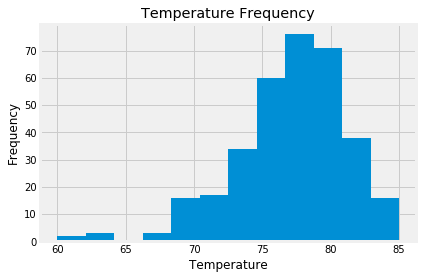

In [153]:
# Choose the station with the highest number of temperature observations.

MostActiveStationT = session.query(Measurement.station).group_by(Measurement.station).order_by(Measurement.tobs.desc()).first()
print(f'The station with the highest number of temperature observations is {MostActiveStationT[0]}')

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# 1. Query to retrieve the last 12 months of temperature observation. The results is a list of tuples of (date,tobs). 
TempLast12Months = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= last12monthsS).filter(Measurement.station == MostActiveStationT[0]).group_by(Measurement.date).all()

# 2. Save the query results as a Pandas DataFrame and set the index to the date column

TempDF = pd.DataFrame(TempLast12Months, columns = ["date","tobs"])
TempDF.set_index("date", inplace=True,)
TempDF.head()

# 3. Sort the dataframe by date
TempDF.sort_index(0,ascending=False)

# 4. Plot Histogram

plt.hist(TempDF["tobs"], bins = 12)
plt.title("Temperature Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
